# Objectives

1. Recap on Random Variables (RVs) (What is a RV ? What are the types of RVs ?)
2. Recap on RV Probability Distribution Functions (PDFs) and Probability Mass Functions (PMFs)
3. Different examples on common PDFs/PMFs: Normal, Uniform, Binomial, Poisson
4. Law of Large Numbers

# Warm-up

**Do a bit of research to find out/recap on answers to the following questions:**

* What is a Random Varibale (RV) ? How can a RV be described ?
* What random events could be described in the pictures?
* Do you know a probability distribution that describes this type of event?

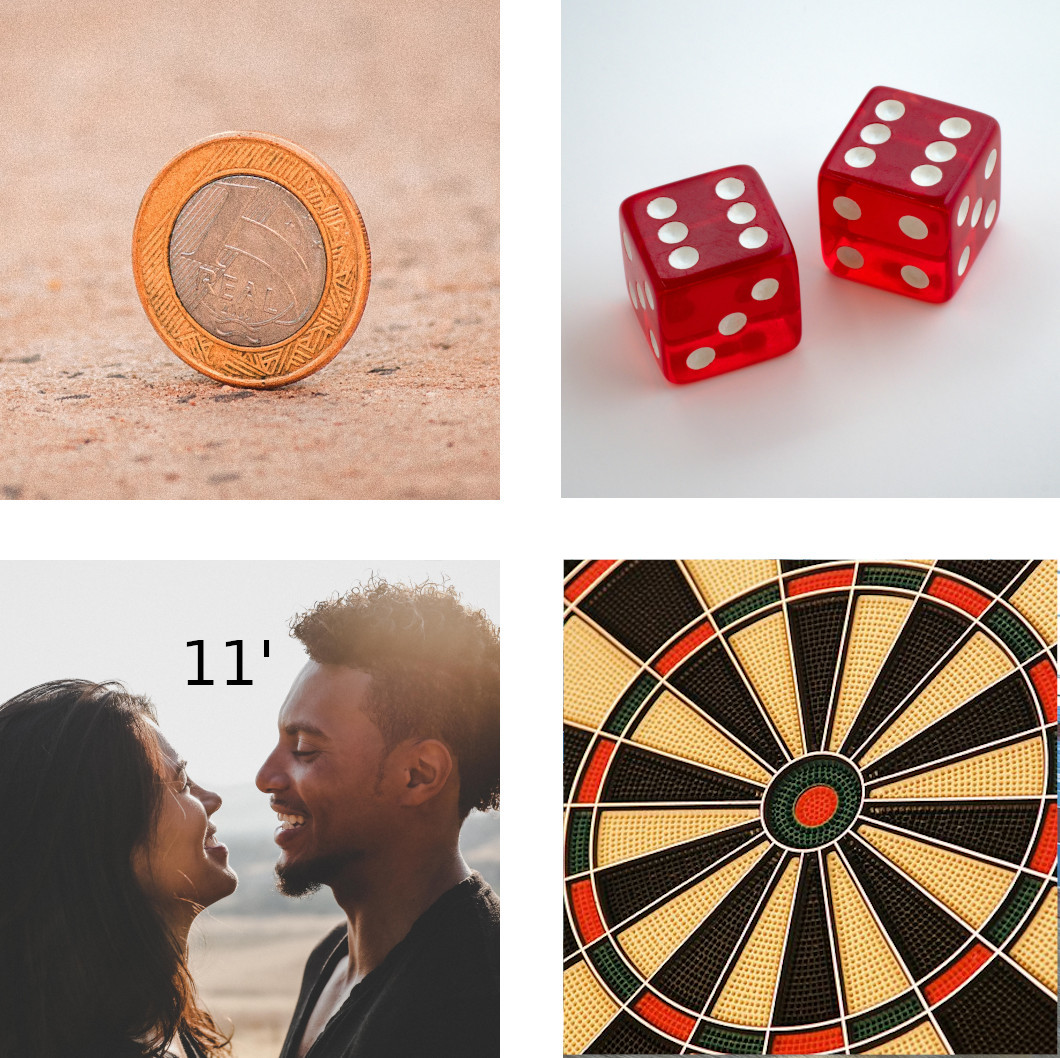

In [17]:
import numpy as np
import scipy
from scipy import stats 
from scipy.stats import norm, skew, kurtosis
from matplotlib import pyplot as plt
import seaborn as sns
import math

## 1. Recap on Random Variables (RVs) 

### SOME BASICS

In [2]:
x = np.arange(4) # return numbers between 0 and 3
x = np.append(x,[3,1,1,12])
print(x)
print('mean_x=', np.mean(x),'\n', \
      'median_x=', np.median(x),'\n', \
      'mode_x=',  stats.mode(x),'\n', \
      'range_x =', max(x)-min(x))

[ 0  1  2  3  3  1  1 12]
mean_x= 2.875 
 median_x= 1.5 
 mode_x= ModeResult(mode=array([1]), count=array([3])) 
 range_x = 12


In [ ]:
[0, 1, 1, 1, 2, 3, 3, 12]

Most distribution functions are described by their mean and range. But if there are outliers (e.g. salaries in a country), the median is a better measure of your average

### What is a RV ?

**Random Variable:** 

A variable whose values are selected through a random phenomenon. The underlying phenomenon usually can be described by a typical distribution function

**Examples:**

1. Coin toss
2. Dice roll
3. Waiting time in some queue
4. A person's height

### What are the types of RVs ?

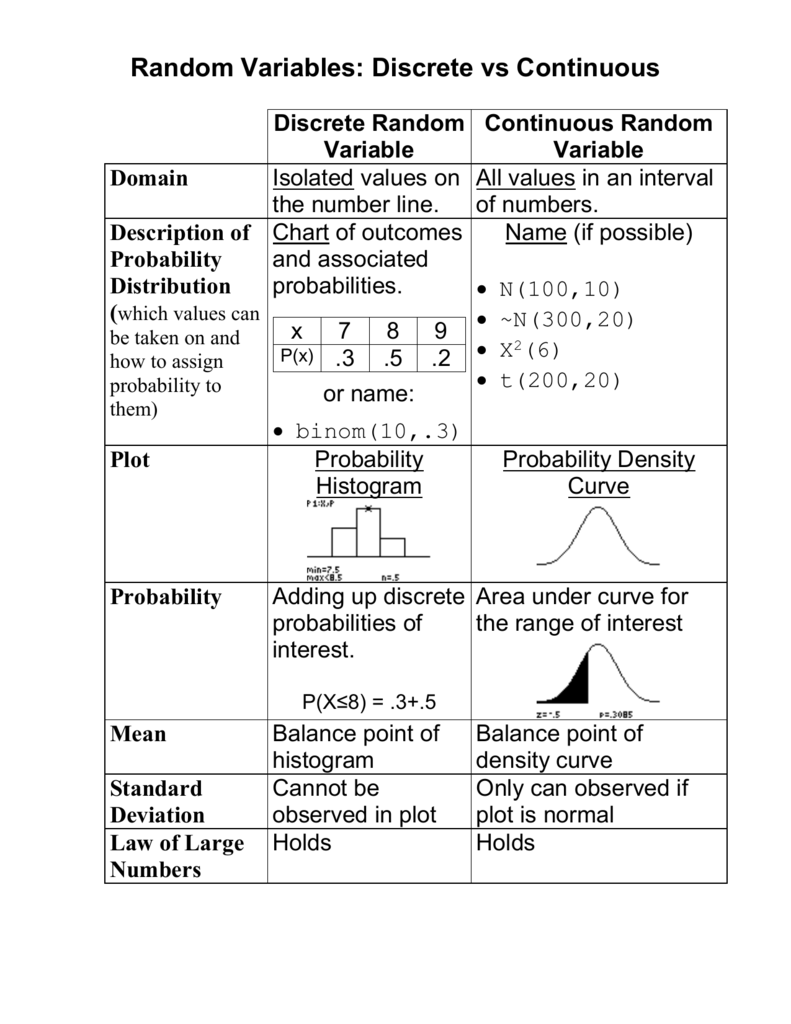


[source](https://studylib.net/doc/5842867/random-variables--discrete-vs-continuous)

## 2. Probability Distribution Functions (PDFs) and Probability Mass Functions (PMFs) 

### What is a PMF ?

**Example**: Sum of two dice rolls

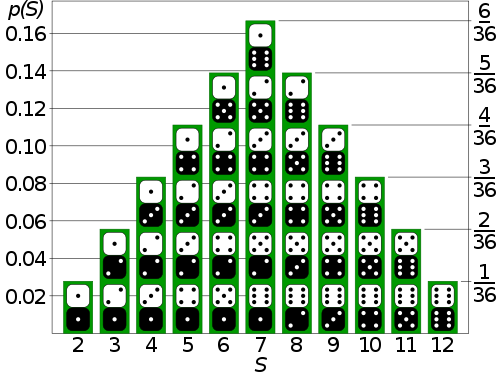

[source](https://en.wikipedia.org/wiki/Probability_distribution)

### What is a PDF ?

**Example: Normal Distribution PDF**

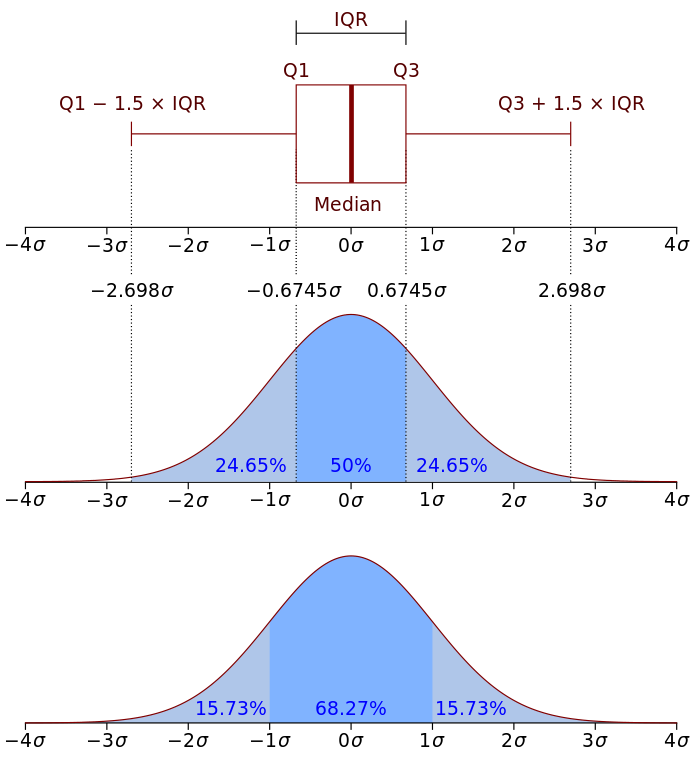

[source](https://en.wikipedia.org/wiki/Probability_density_function)

**iid == Independent Identically Distributed** 

- Independent and identically distributed RVs could be discrete or continuous
- They have the same probability distribution function but are independent from each other
- Example: rolling two dice in a row (discrete) and the heights of two people drawn at random from a population (continuous)

## 3.  Common PDFs/PMFs: Normal, Uniform, Binomial, Poisson

### 3.1 Uniform Distribution

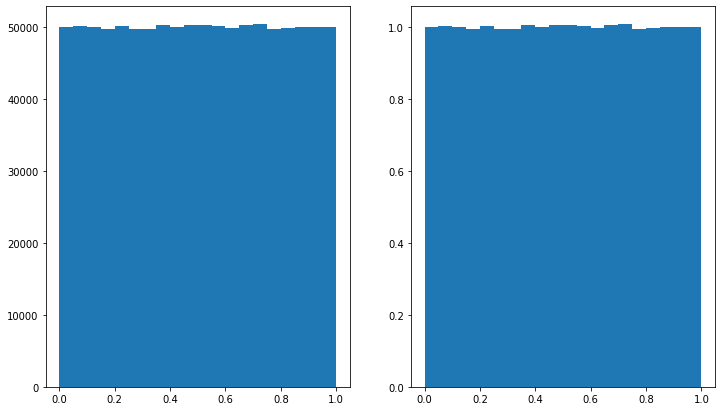

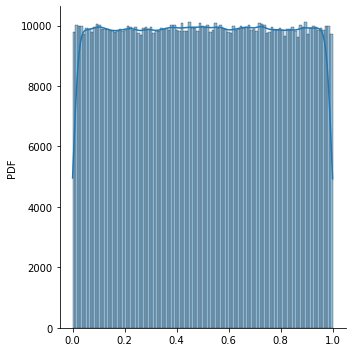

In [20]:
var_uniform = np.random.random(1000000)

plt.figure(figsize=(12,7))

plt.subplot(121)
plt.hist(var_uniform, bins=20)

plt.subplot(122)
plt.hist(var_uniform, density=True, bins=20)



sns.displot(var_uniform, kde=True)
plt.ylabel('PDF');

Reference for when you get confused and have time: https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok

Essentially, y values are ok to be larger than 1, as long as we talk about the probability density. They need to however then be squeezed into a tiny base, so that the overall area cannot be larger than 1.

### 3.2 Normal (Gaussian) Distribution

A lot of things in the real world come from an underlying normal distribution.

Example: You are measuring the mean height of a population. The more measurement you have, the more your measurements are likely to follow the Gaussian curve, around the mean of your population height.

In [29]:
nor_mean = 5
nor_std = 1

np.random.seed(100554)
var_normal = np.random.normal(nor_mean, nor_std, 1000000)


In [30]:
len(var_normal)

1000000

In [31]:
var_normal

array([4.07615015, 5.63812721, 4.783577  , ..., 4.0394189 , 5.90605941,
       6.9600619 ])

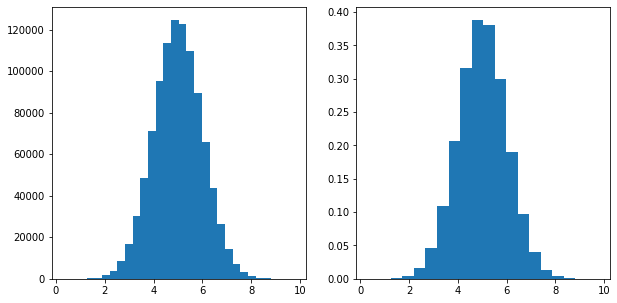

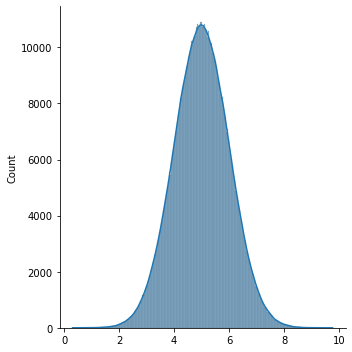

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(121) 
plt.hist(var_normal, bins=30);

plt.subplot(122)
plt.hist(var_normal, density=True, bins=20);


sns.displot(var_normal, kde=True);

### Example on plotting the PDF, CDF 

Probability density function, probability mass function, cumulative distribution function.

In [6]:
rv = np.random.normal(0, 1, 1000)

# here, the mean of the distribution is 0 and the std is 1

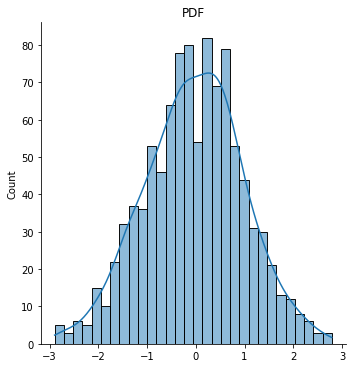

In [7]:
# Plot the pdf

sns.displot(rv, kde=True, bins=30) ;
plt.title('PDF') ;

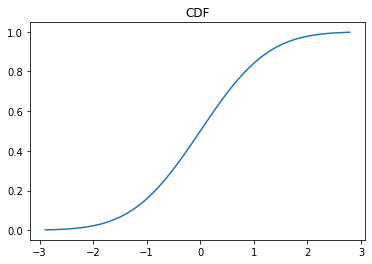

In [8]:
# Plot the cdf

sns.lineplot(x=rv, y=scipy.stats.norm.cdf(rv));
plt.title('CDF');


Cumulative Distribution Function gives the probability that a 
random variable will take up a value up to a certain cut-off.

#### Let's modify the means and the standard deviation

In [33]:
std1 = 1
std2 = 2
std3 = 5

mean = 10

rv1 = np.random.normal(mean, std1, 1000)
rv2 = np.random.normal(mean, std2, 1000)
rv3 = np.random.normal(mean, std3, 1000)

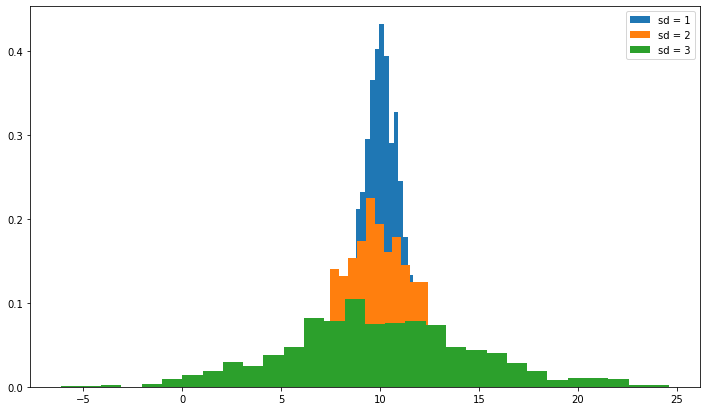

In [34]:
plt.figure(figsize=(12,7)) ;

plt.hist(rv1, density=True, bins=30, label='sd = 1') ;
plt.hist(rv2, density=True, bins=30, label='sd = 2') ;
plt.hist(rv3, density=True, bins=30, label='sd = 3') ;
plt.legend() ;

####  Confidence Intervals

$$ CI = \bar{x} \pm z \frac{\sigma}{\sqrt{n}}$$


In the above equation the $\sigma$ is the standard deviation, z is the confidence level and n is the sample size.

68.2 - 95 - 99.97 % confidence intervals correspond to 1-2-3 $\sigma$ levels.

For eg. if you report your mean with  3$\sigma$, this is a confidence level of 99.97%, the percentage of times, this will be your sample mean, or the likelihood that the true value of your population parameter is this. 

Think about the error bars. (In economics 2 $\sigma$ errors are common, in astronomy you try 3).

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


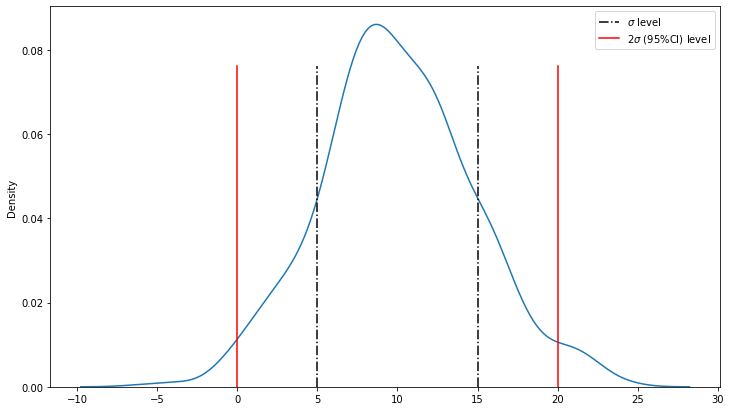

In [35]:
plt.figure(figsize=(12,7))

sns.distplot(rv3, hist = False, kde = True)
y = np.arange(100)/1300
x = np.zeros(100) + 10
plt.plot(x + std3 ,y,'-.k',label = '$\sigma$ level')
plt.plot(x - std3 ,y,'-.k')
plt.plot(x + 2*std3 ,y,'r',label = '$2 \sigma$ (95%CI) level')
plt.plot(x - 2*std3 ,y,'r')
plt.legend()


### 3.3 Bernoulli Distribution


* Two possible outcomes.

* Coin toss, pass/fail, etc.

Success probability is p, failure probability (1-p).

If it's a fair coin, that means 0.5 probability of being heads and 1-0.5 probability of being tails.

### 3.4 Binomial Distribution

Sum of independent and identically distributed **iid** random variables.

If you had two coin tosses, for three heads your probability would be 

$p^3 = 0.5^3 = 0.125$

A nice long explanation here: 
    https://math.stackexchange.com/questions/838107/what-is-the-difference-and-relationship-between-the-binomial-and-bernoulli-distr
    



Flipping the fair coin 20 times

In [42]:
n_flip = 20
var_binom = np.random.binomial(n_flip, 0.5)
print(f'number of successes: {var_binom}')


number of successes: 10


In [43]:
var_binom 

10

### 3.5 Poisson Distribution

POISSON DISTRIBUTION (in the course material)
The probability is given by  𝑝=𝑟𝑥𝑒−𝑟/𝑥! 

where

t: time interval

r = rate (is average number of events happening in a given interval)

x: value for which you are trying to calculate the probability.



**Question: Let's say 5 people on average come at the reception every hour. What is the probability of 11 people coming in the tomorrow at this hour ?**


*$p = r^x e^{-r}/x!$*
 
*$p = 5^{11} e^{-5}/11!$*


In [13]:
p = 5 ** 11 * math.exp(-5) / math.factorial(11)
p

0.00824217668537358

## 4. Law of Large Numbers

**LAW OF LARGE NUMBERS**

With larger number of experiments, the mean result get closer to the expected probability. n_trial is like number of coin tosses (so multiple Bernouilli processes adding up as binomial). You can check that by changing the number of flips above.

This is also why, at the beginning of the notebook if you increased the n for the normal distribution (or the uniform) the samples became representative of the underlying distribution.

In [45]:
np.random.seed(49)
n_trial1 = 1000000
n_trial2 = 100
n = 10
var_binom1 = np.random.binomial(10, 0.5, n_trial1) # check out CLT, below.
var_binom2 = np.random.binomial(10, 0.5, n_trial2) 


print(f'''The number of successes (heads) in 10 \
trials is = {var_binom2.mean()}''')


print(f'''The number of successes (heads) in 10 \
trials is = {var_binom1.mean()}''')

print(var_binom1, len(var_binom1))
print(var_binom2, len(var_binom2))

The number of successes (heads) in 10 trials is = 4.83
The number of successes (heads) in 10 trials is = 4.999313
[4 4 7 ... 5 5 5] 1000000
[4 4 6 5 6 5 6 5 3 2 5 7 5 5 4 4 7 6 4 6 6 5 6 5 3 4 8 7 6 5 4 4 4 5 5 6 6
 2 7 8 5 4 6 4 4 4 3 6 5 7 5 4 3 3 4 3 4 5 3 0 6 5 7 5 4 6 5 5 2 6 5 7 4 6
 8 4 4 2 4 3 9 7 4 3 3 7 6 2 2 5 8 6 6 6 5 3 3 7 3 3] 100


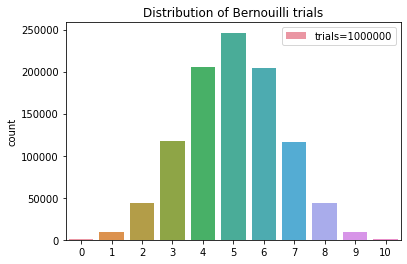

In [15]:
sns.countplot(x=var_binom1, label = 'trials={}'.format(n_trial1)) ;
plt.title('Distribution of Bernouilli trials') ;
plt.legend() ;

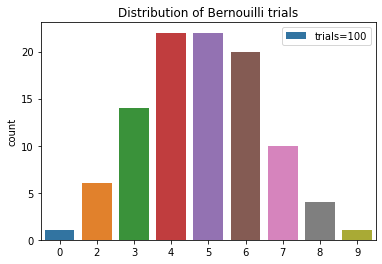

In [16]:
sns.countplot(x=var_binom2, label = 'trials={}'.format(n_trial2)) ;
plt.title('Distribution of Bernouilli trials') ;
plt.legend() ;